### Ploting tendencies using the processed dataset

### Load libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
sns.set_style("whitegrid")
plt.rc('font', size=14)

### Auxiliar functions

In [8]:
def plot_barplot(df_data, hue_column, axis_data,colors):
    df_morning = df_data[[hue_column, "Average IgA Morning"]]
    df_morning.columns = [hue_column, "Average IgA"]
    df_morning["Time"] = "Morning"

    df_afternoon = df_data[[hue_column, "Average IgA Afternoon"]]
    df_afternoon.columns = [hue_column, "Average IgA"]
    df_afternoon["Time"] = "Afternoon"

    df_to_plot = pd.concat([df_morning, df_afternoon], axis=0)
    sns.barplot(
        ax=axis_data, data=df_to_plot, x="Time", y="Average IgA", hue=hue_column, palette=colors, fill=False
    )

In [9]:
def plot_linebar(df_data, hue_column, axis_data,colors):
    df_morning = df_data[[hue_column, "Average IgA Morning"]]
    df_morning.columns = [hue_column, "Average IgA"]
    df_morning["Time"] = "Morning"

    df_afternoon = df_data[[hue_column, "Average IgA Afternoon"]]
    df_afternoon.columns = [hue_column, "Average IgA"]
    df_afternoon["Time"] = "Afternoon"

    df_to_plot = pd.concat([df_morning, df_afternoon], axis=0)
    sns.lineplot(
        ax=axis_data, data=df_to_plot, x="Time", y="Average IgA", hue=hue_column,
        markers=True, dashes=False, palette=colors
    )

In [10]:
def plot_differences_group(axis_data, colors, df_data, name_col1, name_col2):
    unique_col1 = df_data[name_col1].unique()
    unique_col2 = df_data[name_col2].unique()

    df_lists = []
    for col1 in unique_col1:
        for col2 in unique_col2:
            df_filter = df_data[(df_data[name_col2] == col2) & (df_data[name_col1] == col1)]
            df_filter["Group"] = f"{col2}-{col1}"

            df_morning = df_filter[["Group", "Average IgA Morning"]]
            df_morning.columns = ["Group", "Average IgA"]
            df_morning["Time"] = "Morning"

            df_afternoon = df_filter[["Group", "Average IgA Afternoon"]]
            df_afternoon.columns = ["Group", "Average IgA"]
            df_afternoon["Time"] = "Afternoon"

            df_lists.append(df_morning)
            df_lists.append(df_afternoon)


    df_to_plot = pd.concat(df_lists, axis=0)

    sns.barplot(
            ax=axis_data, data=df_to_plot, hue="Time", y="Average IgA", x="Group", palette=colors
        )

### Load processed dataset

In [11]:
df_data = pd.read_csv("../processed_data/1_processed_data.csv")
df_data.head()

,Name,ID,Attachment,ITERS range,Gender,IgA D1-Morning,IgA D1-Afternoon,IgA D2-Morning,IgA D2-Afternoon,Sensitivity,Cis total mean,Average IgA Morning,Average IgA Afternoon,Average Difference IgA
0,Maximiliano-Cárdenas-Catelicán,1,Insecure,Average Quality,Male,20.076728,31.719207,23.453752,25.016903,2,3.884615,21.765240,28.368055,6.602815
1,Martín-Pérez-González,4,Secure,Average Quality,Male,28.584920,82.400761,28.361209,19.363161,3,3.807692,28.473065,50.881961,22.408896
2,Noemí-Cárdenas-Gutierrez,5,Secure,Average Quality,Female,161.424693,46.867951,39.006348,52.728307,5,3.807692,100.215520,49.798129,-50.417391
3,Jasna-Mansilla-Mansilla,7,Insecure,Average Quality,Female,26.747838,47.213491,21.599136,35.942378,1,3.846154,24.173487,41.577934,17.404447
4,Jhampiere-Largacha-Yañez,11,NaN,Average Quality,Male,118.901337,47.213491,37.125222,382.715268,5,3.961538,78.013279,214.964380,136.951100


### Ploting IGA distribution based on attachment, Gender, and ITERS range

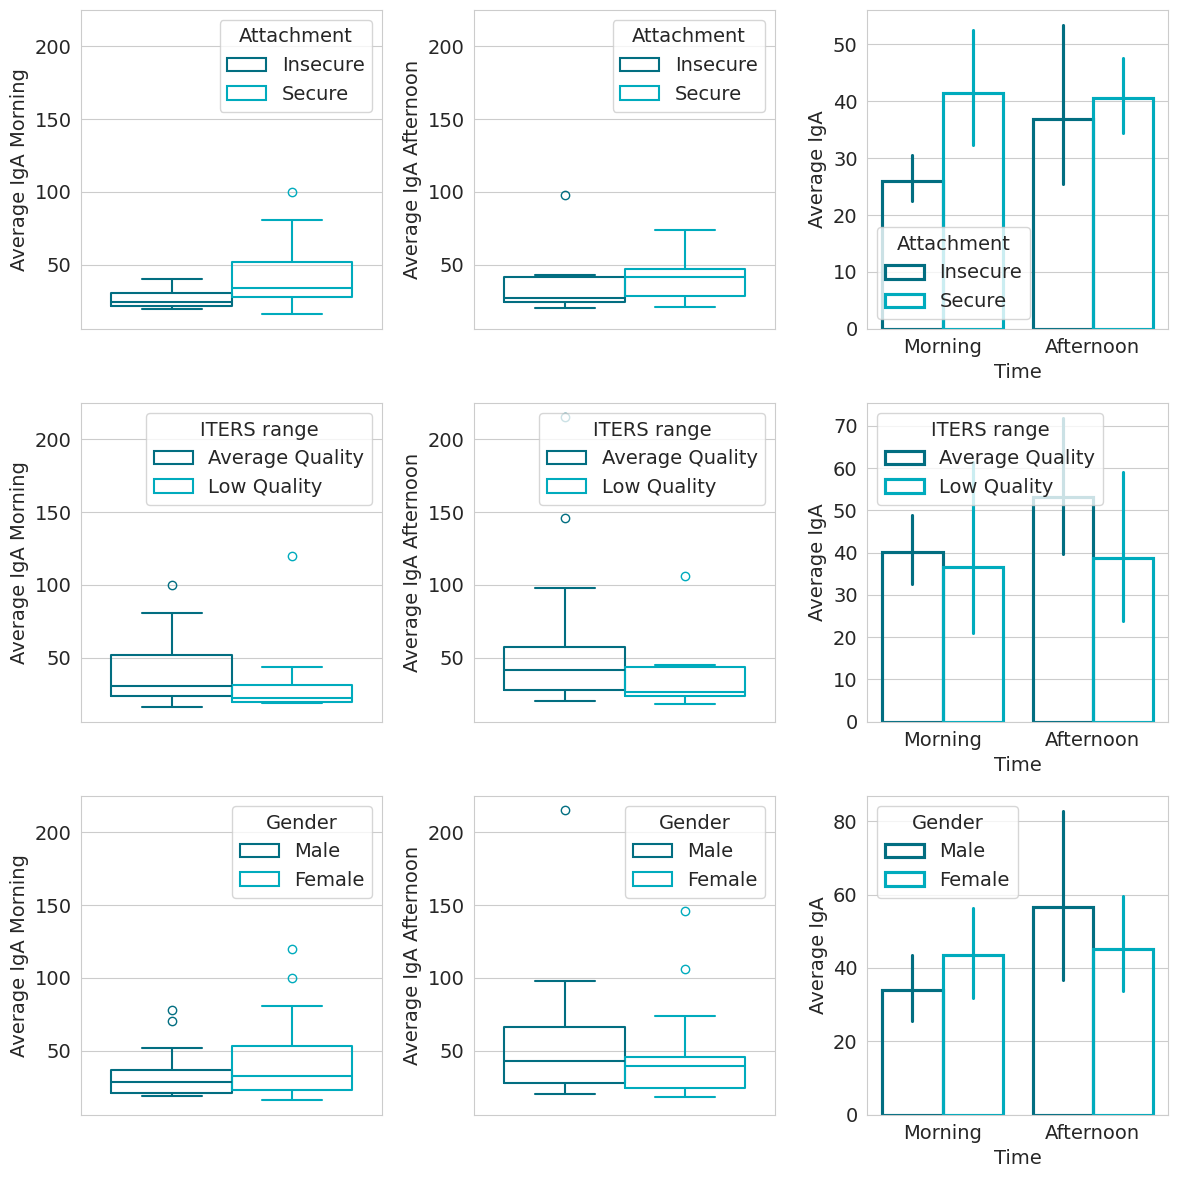

In [12]:
fig = plt.figure(figsize=(12, 12))
gs = GridSpec(3, 3, figure=fig)

palette_values = ['#026E81', '#00ABBD', '#0099DD', '#FF9933', '#A1C7E0']
colors = sns.color_palette(palette_values)

# Attachment
ax_data1 = fig.add_subplot(gs[0, 0])
ax_data2 = fig.add_subplot(gs[0, 1], sharey=ax_data1)
ax_data3 = fig.add_subplot(gs[0, 2])

sns.boxplot(ax=ax_data1, data=df_data, hue="Attachment", y="Average IgA Morning", fill=False, palette=colors)
sns.boxplot(ax=ax_data2, data=df_data, hue="Attachment", y="Average IgA Afternoon", fill=False, palette=colors)

plot_barplot(df_data, "Attachment", ax_data3, colors)

# ITERS
ax_data4 = fig.add_subplot(gs[1, 0], sharey=ax_data1)
ax_data5 = fig.add_subplot(gs[1, 1], sharey=ax_data1)
ax_data6 = fig.add_subplot(gs[1, 2])

sns.boxplot(ax=ax_data4, data=df_data, hue="ITERS range", y="Average IgA Morning", fill=False, palette=colors)
sns.boxplot(ax=ax_data5, data=df_data, hue="ITERS range", y="Average IgA Afternoon", fill=False, palette=colors)

plot_barplot(df_data, "ITERS range", ax_data6, colors)

# Gender
ax_data7 = fig.add_subplot(gs[2, 0], sharey=ax_data1)
ax_data8 = fig.add_subplot(gs[2, 1], sharey=ax_data1)
ax_data9 = fig.add_subplot(gs[2, 2])

sns.boxplot(ax=ax_data7, data=df_data, hue="Gender", y="Average IgA Morning", fill=False, palette=colors)
sns.boxplot(ax=ax_data8, data=df_data, hue="Gender", y="Average IgA Afternoon", fill=False, palette=colors)

plot_barplot(df_data, "Gender", ax_data9, colors)

plt.tight_layout()

plt.savefig("../plots/1_IgA_distribution_bar.png", dpi=300)

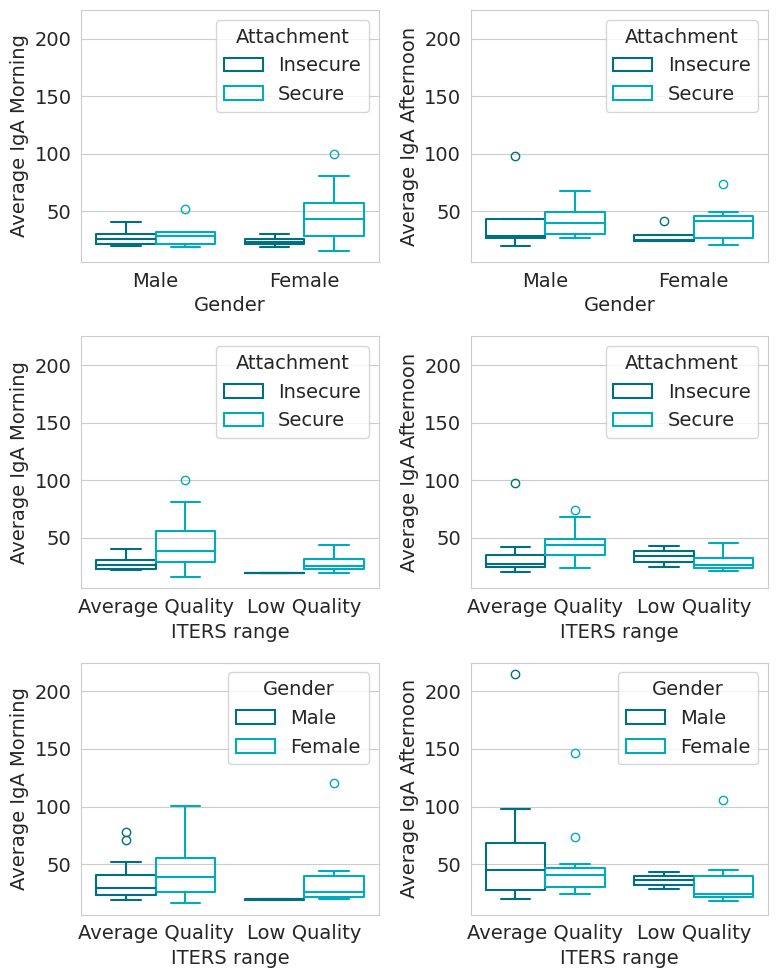

In [13]:
fig = plt.figure(figsize=(8, 10))
gs = GridSpec(3, 2, figure=fig)

# Attachment v/s Gender
ax_data1 = fig.add_subplot(gs[0, 0])
ax_data2 = fig.add_subplot(gs[0, 1], sharey=ax_data1)
#ax_data3 = fig.add_subplot(gs[0, 2])

sns.boxplot(ax=ax_data1, data=df_data, hue="Attachment", x= "Gender", y="Average IgA Morning", fill=False, palette=colors)
sns.boxplot(ax=ax_data2, data=df_data, hue="Attachment", x= "Gender", y="Average IgA Afternoon", fill=False, palette=colors)

#plot_differences_group(ax_data3, colors, df_data, "Attachment", "Gender")

# Attachment v/s ITERS
ax_data4 = fig.add_subplot(gs[1, 0], sharey=ax_data1)
ax_data5 = fig.add_subplot(gs[1, 1], sharey=ax_data1)
#ax_data6 = fig.add_subplot(gs[1, 2])

sns.boxplot(ax=ax_data4, data=df_data, hue="Attachment", x= "ITERS range", y="Average IgA Morning", fill=False, palette=colors)
sns.boxplot(ax=ax_data5, data=df_data, hue="Attachment", x= "ITERS range", y="Average IgA Afternoon", fill=False, palette=colors)
#plot_differences_group(ax_data6, colors, df_data, "Attachment", "ITERS range")

# Gender v/s ITERS
ax_data7 = fig.add_subplot(gs[2, 0], sharey=ax_data1)
ax_data8 = fig.add_subplot(gs[2, 1], sharey=ax_data1)
#ax_data9 = fig.add_subplot(gs[2, 2])

sns.boxplot(ax=ax_data7, data=df_data, hue="Gender", x= "ITERS range", y="Average IgA Morning", fill=False, palette=colors)
sns.boxplot(ax=ax_data8, data=df_data, hue="Gender", x= "ITERS range", y="Average IgA Afternoon", fill=False, palette=colors)
#plot_differences_group(ax_data9, colors, df_data, "Gender", "ITERS range")

plt.tight_layout()

plt.savefig("../plots/1_IgA_distribution_grouped.png", dpi=300)


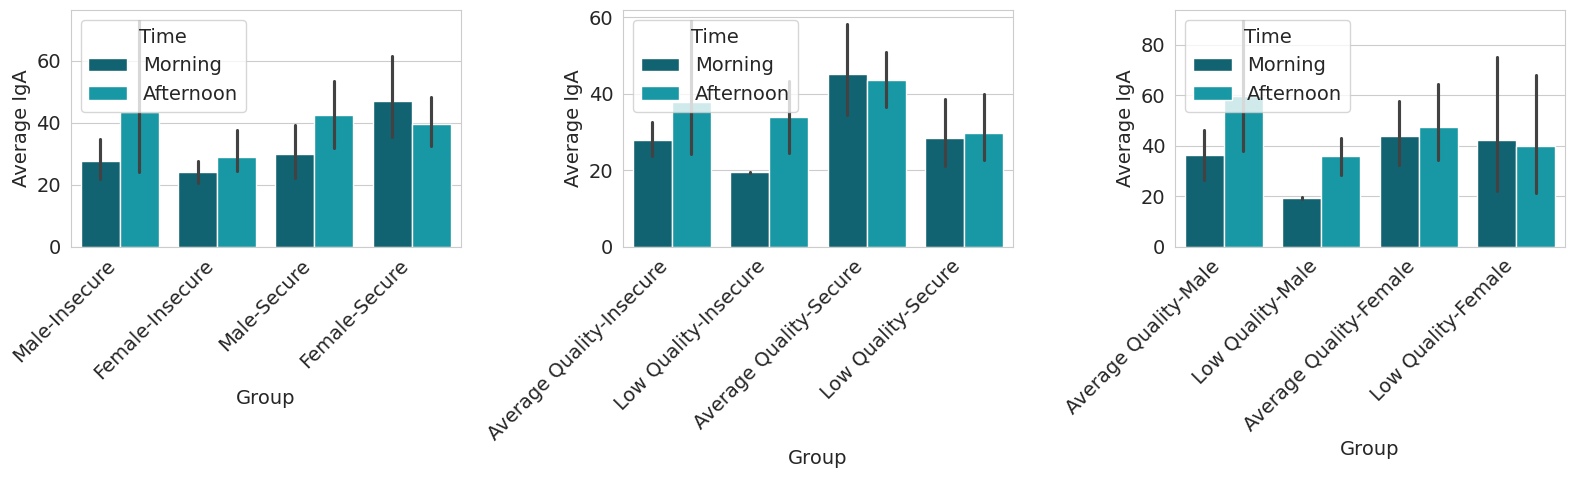

In [14]:
fig = plt.figure(figsize=(16, 5))
gs = GridSpec(1, 3, figure=fig)

ax_data1 = fig.add_subplot(gs[0])
ax_data2 = fig.add_subplot(gs[1])
ax_data3 = fig.add_subplot(gs[2])

plot_differences_group(ax_data1, colors, df_data, "Attachment", "Gender")
plot_differences_group(ax_data2, colors, df_data, "Attachment", "ITERS range")
plot_differences_group(ax_data3, colors, df_data, "Gender", "ITERS range")

fig.autofmt_xdate(rotation=45)

plt.tight_layout()

plt.savefig("../plots/1_IgA_distribution_grouped_differences.png", dpi=300)


In [15]:
df_data.head()

,Name,ID,Attachment,ITERS range,Gender,IgA D1-Morning,IgA D1-Afternoon,IgA D2-Morning,IgA D2-Afternoon,Sensitivity,Cis total mean,Average IgA Morning,Average IgA Afternoon,Average Difference IgA
0,Maximiliano-Cárdenas-Catelicán,1,Insecure,Average Quality,Male,20.076728,31.719207,23.453752,25.016903,2,3.884615,21.765240,28.368055,6.602815
1,Martín-Pérez-González,4,Secure,Average Quality,Male,28.584920,82.400761,28.361209,19.363161,3,3.807692,28.473065,50.881961,22.408896
2,Noemí-Cárdenas-Gutierrez,5,Secure,Average Quality,Female,161.424693,46.867951,39.006348,52.728307,5,3.807692,100.215520,49.798129,-50.417391
3,Jasna-Mansilla-Mansilla,7,Insecure,Average Quality,Female,26.747838,47.213491,21.599136,35.942378,1,3.846154,24.173487,41.577934,17.404447
4,Jhampiere-Largacha-Yañez,11,NaN,Average Quality,Male,118.901337,47.213491,37.125222,382.715268,5,3.961538,78.013279,214.964380,136.951100


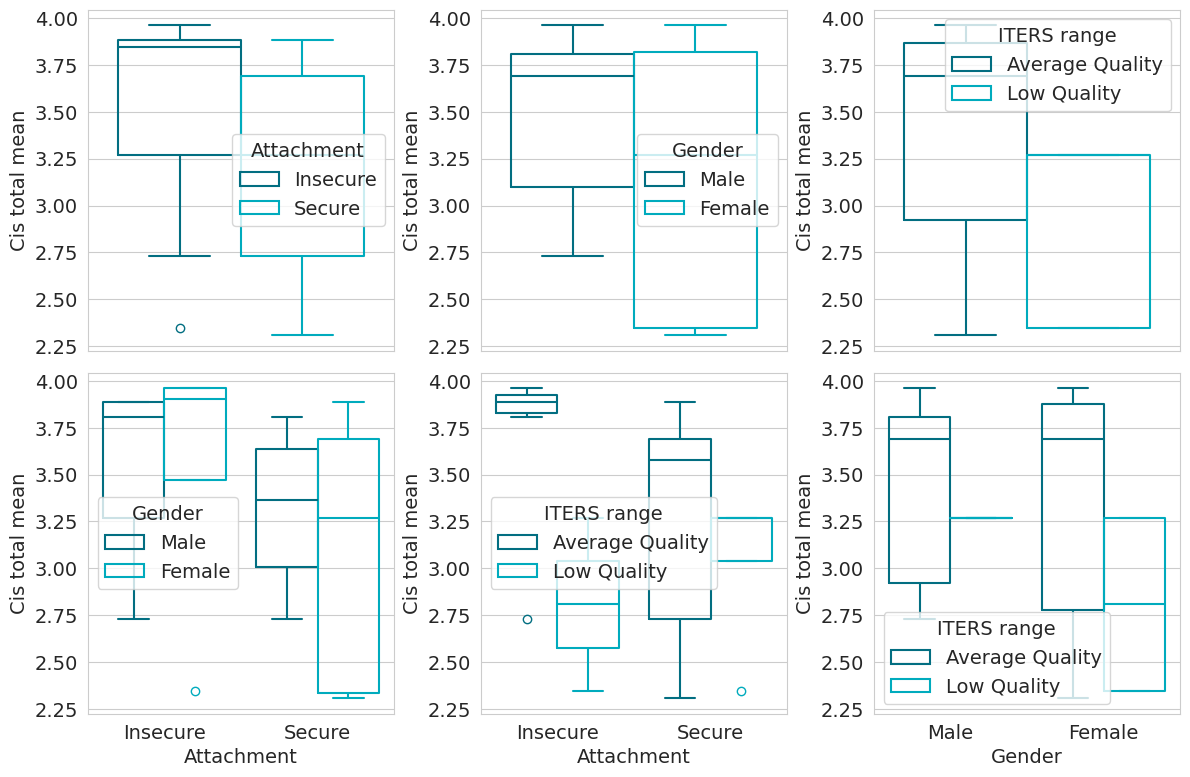

In [16]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 3, figure=fig)

# Attachment v/s Gender
ax_data1 = fig.add_subplot(gs[0,0])
ax_data2 = fig.add_subplot(gs[0,1], sharey=ax_data1)
ax_data3 = fig.add_subplot(gs[0,2], sharey=ax_data1)
ax_data4 = fig.add_subplot(gs[1,0], sharey=ax_data1)
ax_data5 = fig.add_subplot(gs[1,1], sharey=ax_data1)
ax_data6 = fig.add_subplot(gs[1,2], sharey=ax_data1)

sns.boxplot(ax=ax_data1, data=df_data, hue="Attachment", y="Cis total mean", fill=False, palette=colors)
sns.boxplot(ax=ax_data2, data=df_data, hue="Gender", y="Cis total mean", fill=False, palette=colors)
sns.boxplot(ax=ax_data3, data=df_data, hue="ITERS range", y="Cis total mean", fill=False, palette=colors)

sns.boxplot(ax=ax_data4, data=df_data, x="Attachment", hue="Gender", y="Cis total mean", fill=False, palette=colors)
sns.boxplot(ax=ax_data5, data=df_data, x="Attachment", hue="ITERS range", y="Cis total mean", fill=False, palette=colors)
sns.boxplot(ax=ax_data6, data=df_data, x="Gender", hue="ITERS range", y="Cis total mean", fill=False, palette=colors)

plt.tight_layout()

plt.savefig("../plots/2_Cis_total_mean_general.png", dpi=300)

In [17]:
df_data.head()

,Name,ID,Attachment,ITERS range,Gender,IgA D1-Morning,IgA D1-Afternoon,IgA D2-Morning,IgA D2-Afternoon,Sensitivity,Cis total mean,Average IgA Morning,Average IgA Afternoon,Average Difference IgA
0,Maximiliano-Cárdenas-Catelicán,1,Insecure,Average Quality,Male,20.076728,31.719207,23.453752,25.016903,2,3.884615,21.765240,28.368055,6.602815
1,Martín-Pérez-González,4,Secure,Average Quality,Male,28.584920,82.400761,28.361209,19.363161,3,3.807692,28.473065,50.881961,22.408896
2,Noemí-Cárdenas-Gutierrez,5,Secure,Average Quality,Female,161.424693,46.867951,39.006348,52.728307,5,3.807692,100.215520,49.798129,-50.417391
3,Jasna-Mansilla-Mansilla,7,Insecure,Average Quality,Female,26.747838,47.213491,21.599136,35.942378,1,3.846154,24.173487,41.577934,17.404447
4,Jhampiere-Largacha-Yañez,11,NaN,Average Quality,Male,118.901337,47.213491,37.125222,382.715268,5,3.961538,78.013279,214.964380,136.951100


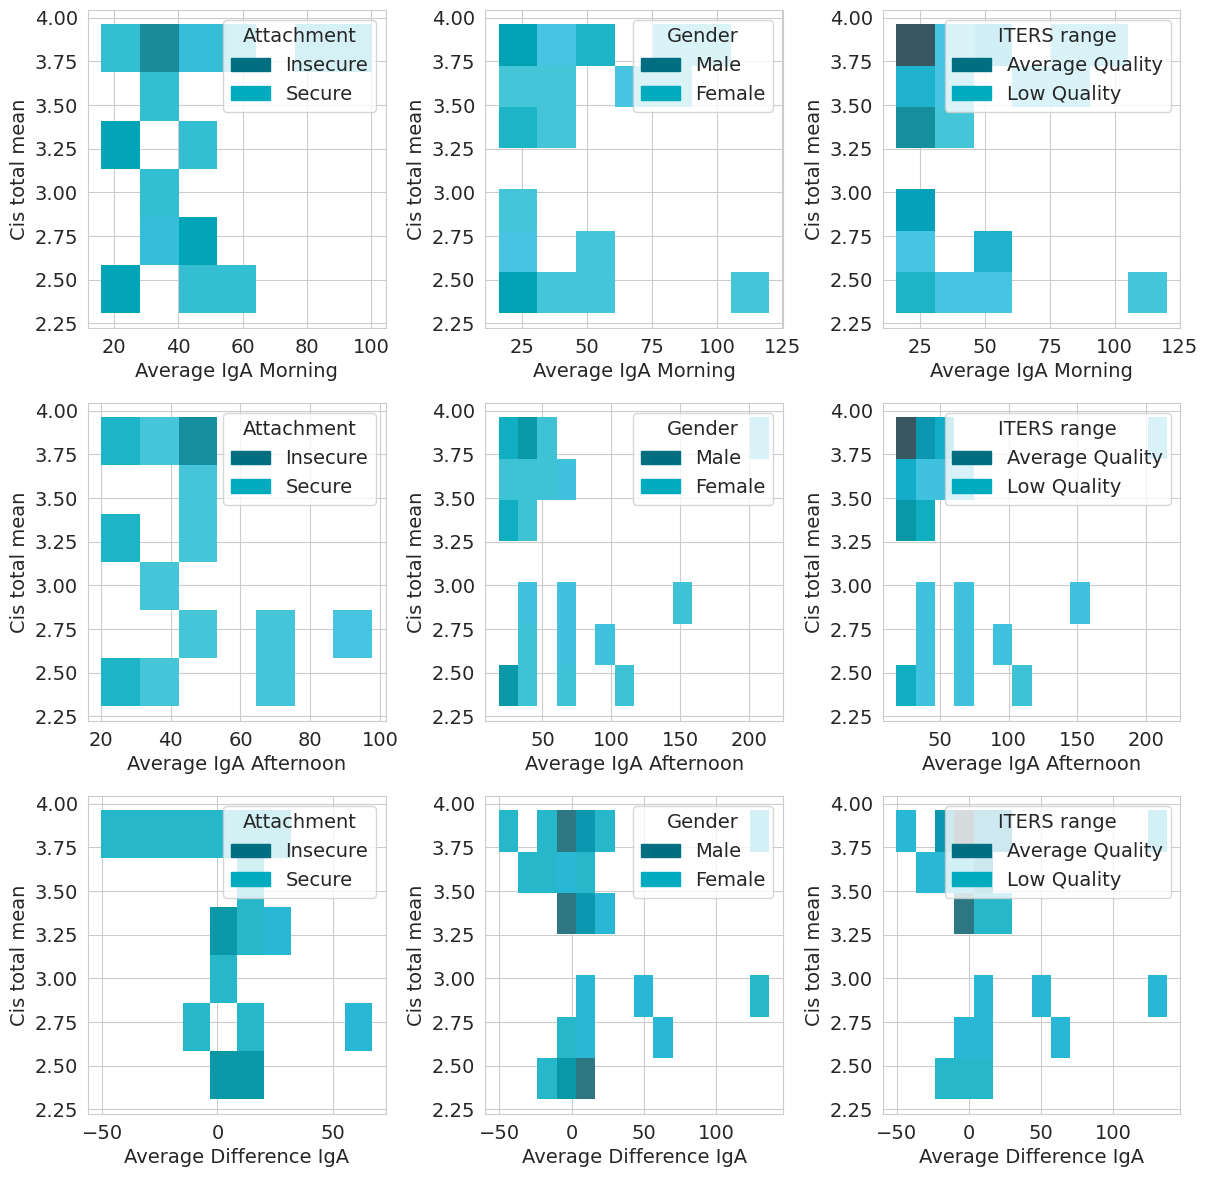

In [18]:
fig = plt.figure(figsize=(12, 12))
gs = GridSpec(3, 3, figure=fig)

# Attachment v/s Gender
ax_data1 = fig.add_subplot(gs[0,0])
ax_data2 = fig.add_subplot(gs[0,1], sharey=ax_data1)
ax_data3 = fig.add_subplot(gs[0,2], sharey=ax_data1)
ax_data4 = fig.add_subplot(gs[1,0], sharey=ax_data1)
ax_data5 = fig.add_subplot(gs[1,1], sharey=ax_data1)
ax_data6 = fig.add_subplot(gs[1,2], sharey=ax_data1)

ax_data7 = fig.add_subplot(gs[2,0], sharey=ax_data1)
ax_data8 = fig.add_subplot(gs[2,1], sharey=ax_data1)
ax_data9 = fig.add_subplot(gs[2,2], sharey=ax_data1)

sns.histplot(ax=ax_data1, data=df_data, hue="Attachment", x="Average IgA Morning", y="Cis total mean", palette=colors)
sns.histplot(ax=ax_data2, data=df_data, hue="Gender", x="Average IgA Morning", y="Cis total mean", palette=colors)
sns.histplot(ax=ax_data3, data=df_data, hue="ITERS range", x="Average IgA Morning", y="Cis total mean", palette=colors)

sns.histplot(ax=ax_data4, data=df_data, hue="Attachment", x="Average IgA Afternoon", y="Cis total mean", palette=colors)
sns.histplot(ax=ax_data5, data=df_data, hue="Gender", x="Average IgA Afternoon", y="Cis total mean", palette=colors)
sns.histplot(ax=ax_data6, data=df_data, hue="ITERS range", x="Average IgA Afternoon", y="Cis total mean", palette=colors)

sns.histplot(ax=ax_data7, data=df_data, hue="Attachment", x="Average Difference IgA", y="Cis total mean", palette=colors)
sns.histplot(ax=ax_data8, data=df_data, hue="Gender", x="Average Difference IgA", y="Cis total mean", palette=colors)
sns.histplot(ax=ax_data9, data=df_data, hue="ITERS range", x="Average Difference IgA", y="Cis total mean", palette=colors)

plt.tight_layout()

plt.savefig("../plots/3_Cis_total_mean_IgA.png", dpi=300)

In [19]:
df_data["Sensitivity"].value_counts()

Sensitivity
1    8
5    6
4    6
6    6
3    5
2    3
0    1
Name: count, dtype: int64

In [20]:
df_data["Sensitivity"]= df_data["Sensitivity"].replace({0:"0-1", 1:"0-1", 2: "2-3", 3: "2-3",
                                4: "4-5", 5:"4-5", 6: "5+"})

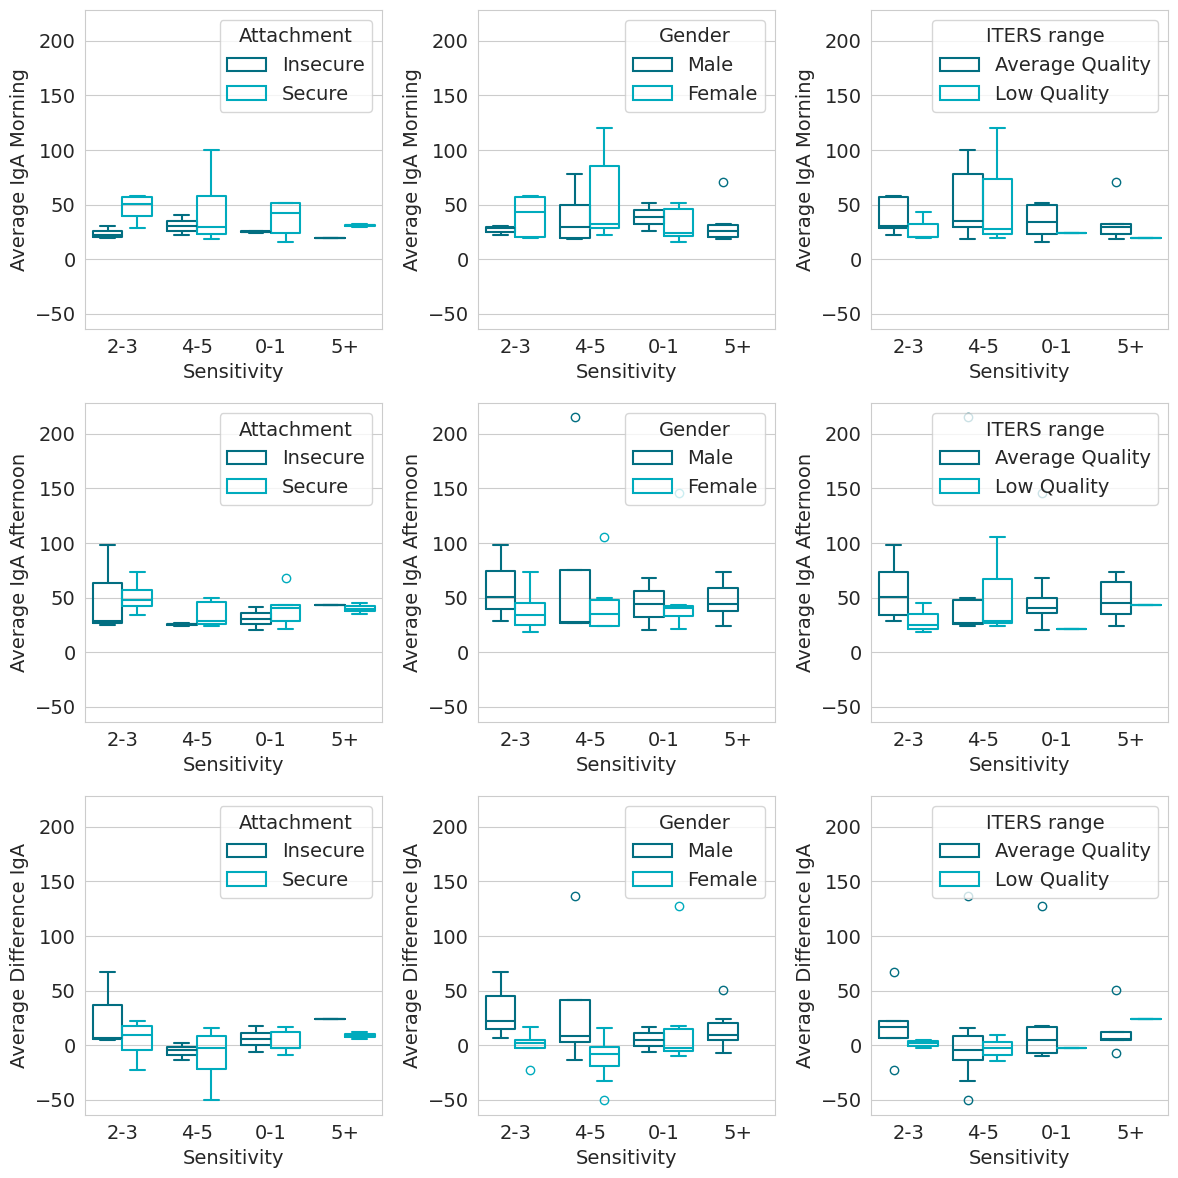

In [21]:
fig = plt.figure(figsize=(12, 12))
gs = GridSpec(3, 3, figure=fig)

palette_values = ['#026E81', '#00ABBD', '#0099DD', '#FF9933', '#A1C7E0']
colors = sns.color_palette(palette_values)

# Attachment
ax_data1 = fig.add_subplot(gs[0, 0])
ax_data2 = fig.add_subplot(gs[0, 1], sharey=ax_data1)
ax_data3 = fig.add_subplot(gs[0, 2], sharey=ax_data1)

ax_data4 = fig.add_subplot(gs[1, 0], sharey=ax_data1)
ax_data5 = fig.add_subplot(gs[1, 1], sharey=ax_data1)
ax_data6 = fig.add_subplot(gs[1, 2], sharey=ax_data1)

ax_data7 = fig.add_subplot(gs[2, 0], sharey=ax_data1)
ax_data8 = fig.add_subplot(gs[2, 1], sharey=ax_data1)
ax_data9 = fig.add_subplot(gs[2, 2], sharey=ax_data1)


sns.boxplot(ax=ax_data1, data=df_data, x="Sensitivity", hue="Attachment", y="Average IgA Morning", fill=False, palette=colors)
sns.boxplot(ax=ax_data2, data=df_data, x="Sensitivity", hue="Gender", y="Average IgA Morning", fill=False, palette=colors)
sns.boxplot(ax=ax_data3, data=df_data, x="Sensitivity", hue="ITERS range", y="Average IgA Morning", fill=False, palette=colors)

sns.boxplot(ax=ax_data4, data=df_data, x="Sensitivity", hue="Attachment", y="Average IgA Afternoon", fill=False, palette=colors)
sns.boxplot(ax=ax_data5, data=df_data, x="Sensitivity", hue="Gender", y="Average IgA Afternoon", fill=False, palette=colors)
sns.boxplot(ax=ax_data6, data=df_data, x="Sensitivity", hue="ITERS range", y="Average IgA Afternoon", fill=False, palette=colors)

sns.boxplot(ax=ax_data7, data=df_data, x="Sensitivity", hue="Attachment", y="Average Difference IgA", fill=False, palette=colors)
sns.boxplot(ax=ax_data8, data=df_data, x="Sensitivity", hue="Gender", y="Average Difference IgA", fill=False, palette=colors)
sns.boxplot(ax=ax_data9, data=df_data, x="Sensitivity", hue="ITERS range", y="Average Difference IgA", fill=False, palette=colors)

plt.tight_layout()

plt.savefig("../plots/4_sensitivity_grouped.png", dpi=300)


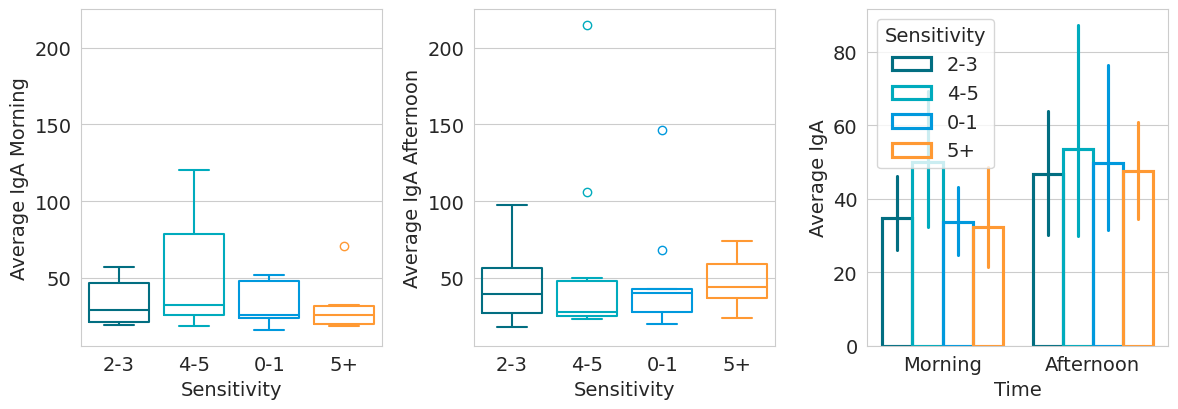

In [22]:
fig = plt.figure(figsize=(12, 12))
gs = GridSpec(3, 3, figure=fig)

palette_values = ['#026E81', '#00ABBD', '#0099DD', '#FF9933', '#A1C7E0']
colors = sns.color_palette(palette_values)

# Attachment
ax_data1 = fig.add_subplot(gs[0, 0])
ax_data2 = fig.add_subplot(gs[0, 1], sharey=ax_data1)
ax_data3 = fig.add_subplot(gs[0, 2])

sns.boxplot(ax=ax_data1, data=df_data, x="Sensitivity", y="Average IgA Morning", fill=False, palette=colors)
sns.boxplot(ax=ax_data2, data=df_data, x="Sensitivity", y="Average IgA Afternoon", fill=False, palette=colors)
plot_barplot(df_data, "Sensitivity", ax_data3, colors)

plt.tight_layout()

plt.savefig("../plots/4_sensitivity_vs_iga.png", dpi=300)
